In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

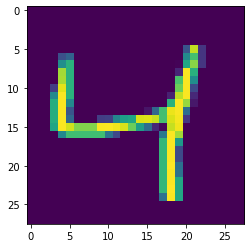

In [5]:
plt.imshow(X_train[2])

In [6]:
Y_train[2]

4

In [7]:
# Scaling

X_train=X_train/255
X_test=X_test/255

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [9]:
X_train.shape
# which means image of size 28x28 and having such 60,000 images
# This can also be written as (28,28,60000), both of them represent same meaning

(60000, 28, 28)

In [10]:
import keras.backend as k
## The info about dimensions is not given (1 dim or 2 dim or 3 dim

#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
img_rows, img_cols=28,28
if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [11]:
# input  (28,28,1)
# conv1 (3,3)  #32 #26,26,32  #para 10*32
# conv2 (3,3)  #64  #24,24,64 # (9*32+1)*64
# MaxPooling2D (2,2) strides=1
# model.add(Dropout(0.25))
# #a,b,c
# flatten length a*b*c #24*24*64
# dense1 128 #128 #128*(24*24*64)+128
# model.add(Dropout(0.5))
# dense2 10 #128*10+10


In [12]:
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [14]:
model.compile(optimizer='Adadelta',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 267s 142ms/step - loss: 2.1998 - accuracy: 0.2504
Epoch 2/10
1875/1875 [==============================] - 285s 152ms/step - loss: 1.8787 - accuracy: 0.5094
Epoch 3/10
1875/1875 [==============================] - 283s 151ms/step - loss: 1.4794 - accuracy: 0.6141
Epoch 4/10
1875/1875 [==============================] - 285s 152ms/step - loss: 1.1578 - accuracy: 0.6750
Epoch 5/10
1875/1875 [==============================] - 294s 157ms/step - loss: 0.9601 - accuracy: 0.7174
Epoch 6/10
1875/1875 [==============================] - 288s 153ms/step - loss: 0.8395 - accuracy: 0.7453
Epoch 7/10
1875/1875 [==============================] - 283s 151ms/step - loss: 0.7632 - accuracy: 0.7656
Epoch 8/10
1875/1875 [==============================] - 287s 153ms/step - loss: 0.6985 - accuracy: 0.7832
Epoch 9/10
1875/1875 [==============================] - 282s 150ms/step - loss: 0.6654 - accuracy: 0.7938
Epoch 10/10
1875/1875 [=======================

In [16]:
# To test on test data

model.evaluate(X_test,Y_test)

313/313 [==============================] - 12s 36ms/step - loss: 0.4161 - accuracy: 0.8881


[0.4161350727081299, 0.8881000280380249]

In [22]:
model.layers

### Check the predictions

In [23]:
Y_predict=model.predict(X_test)

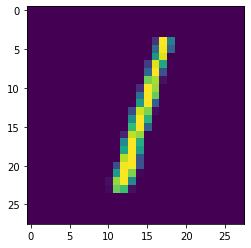

In [24]:
plt.imshow(X_test[2])

In [25]:
# possible probabilities for values from 0 to 9
Y_predict[2]

array([0.0020474 , 0.9009588 , 0.02114947, 0.01648768, 0.00556732,
       0.00704846, 0.00833249, 0.01521682, 0.018497  , 0.00469464],
      dtype=float32)

In [26]:
# To print which number is having max probability from 0 to 9 => our final prediction value
np.argmax(Y_predict[2])

1

In [27]:
print('Actual :',Y_test[2])
print('Predicted :',np.argmax(Y_predict[2]))

Actual : 1
Predicted : 1


In [28]:
Y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [29]:
Y_predict[0:5]

array([[4.9621088e-04, 1.9220497e-04, 2.2423172e-03, 2.0990553e-03,
        1.1644821e-03, 1.0976358e-03, 7.5810865e-05, 9.8296767e-01,
        8.6750271e-04, 8.7971212e-03],
       [9.4209453e-03, 8.5856356e-03, 8.9386046e-01, 1.8077539e-02,
        2.8847879e-05, 9.9225556e-03, 4.6990149e-02, 1.0143236e-04,
        1.2903656e-02, 1.0884283e-04],
       [2.0473972e-03, 9.0095878e-01, 2.1149471e-02, 1.6487682e-02,
        5.5673239e-03, 7.0484602e-03, 8.3324900e-03, 1.5216822e-02,
        1.8497001e-02, 4.6946444e-03],
       [9.8595411e-01, 2.3793202e-06, 7.5331202e-04, 7.6090958e-04,
        4.7682894e-05, 1.9638373e-03, 8.3313342e-03, 8.6716097e-04,
        9.2159712e-04, 3.9758338e-04],
       [4.5540733e-03, 2.7942835e-04, 1.3395235e-02, 9.6372498e-04,
        7.7654427e-01, 3.2438734e-03, 1.7499136e-02, 2.4244951e-02,
        1.2309773e-02, 1.4696550e-01]], dtype=float32)

In [30]:
Y_predict_labels=[np.argmax(i) for i in Y_predict]
Y_predict_labels[0:5]

[7, 2, 1, 0, 4]

In [31]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=Y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    3,    2,    0,    2,   11,    1,    7,    0],
       [   0, 1109,    3,    6,    1,    4,    4,    0,    8,    0],
       [  18,    7,  870,   18,   15,    0,   27,   24,   49,    4],
       [   4,    5,   25,  889,    0,   31,    4,   22,   23,    7],
       [   1,    7,    4,    0,  864,    0,   22,    3,    5,   76],
       [  20,    6,    5,   73,   22,  686,   19,    4,   44,   13],
       [  15,    7,    6,    1,    8,   18,  899,    1,    3,    0],
       [   1,   23,   28,    3,   14,    0,    0,  901,    5,   53],
       [  13,   16,    9,   30,   12,   17,   12,   18,  827,   20],
       [  15,   12,    9,   10,   36,    6,    0,   32,    7,  882]])>

Text(69.0, 0.5, 'Truth')

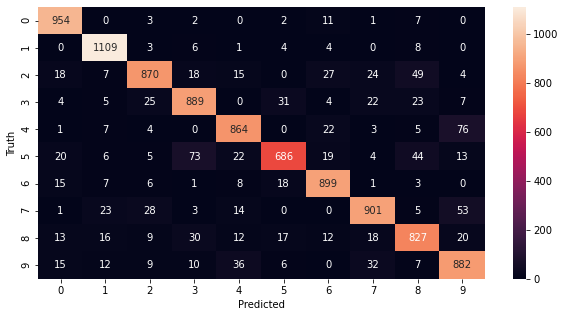

In [32]:
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')